In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# data
x = np.arange(0,10,.1)
sin = np.sin(x)
cos = np.cos(x)

Make some plots

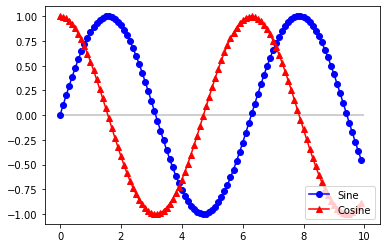

In [14]:
# horizontal line, alpha is transparency
plt.hlines(0,0,10,alpha=.25)
# 'o' for circle, '^' for triangle.  Trailing comma Saves plot info in tuple
sine_handle, = plt.plot(x, sin, marker ='o', color='blue', label="Sine")
cosine_handle, = plt.plot(x, cos, marker='^', color='red', label="Cosine")
plt.legend(loc="lower right")
# save plot as image
plt.savefig("sin_cos.png")
plt.show() # this avoids text output returned from plt.plot 

Helpful documentation:
https://matplotlib.org/api/markers_api.html   
http://matplotlib.org/api/colors_api.html   


New Jersey Weather Example

convert a list of temperatures to celsius and plot using matplotlib

Text(0, 0.5, 'Degrees')

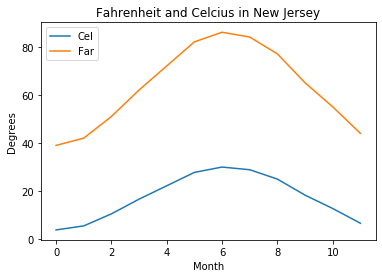

In [27]:
# fahrenheit weather
fweath = [39,42,51,62,72,82,86,84,77,65,55,44]
cweath = [(5/9) * (x - 32) for x in fweath]

x = np.arange(0,len(fweath),1)
cw, = plt.plot(x,cweath)
fw, = plt.plot(x,fweath)
plt.legend((cw,fw),('Cel','Far'),loc = 'upper left')
plt.title('Fahrenheit and Celcius in New Jersey')
plt.xlabel('Month')
plt.ylabel('Degrees')
plot.show()

Bar Charts
Simple example

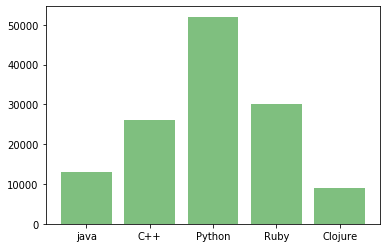

In [34]:
users = [13000,26000,52000,30000,9000]
x = np.arange(0,len(users),1)
plt.bar(x,users,color = 'g',alpha = .5,align = 'center')
# add labels
plt.xticks(x,['java','C++','Python','Ruby','Clojure'])
plt.show()

Scatter Plots

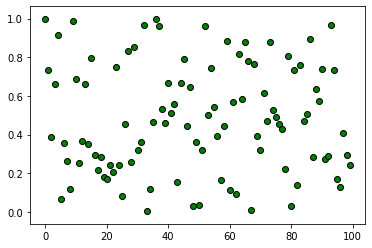

In [39]:
import random
# generate standard uniform data
n = 100
x = np.arange(0,n,1)
data = [random.random() for value in x]
plt.scatter(x,data,facecolors = 'green',edgecolors = 'black')
plt.show()

Using Matplotlib through Pandas Dataframes

In [40]:
import pandas as pd
# data
got = pd.read_csv('got.csv')

In [44]:
got.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [70]:
attackers = got['attacker_king'].value_counts()
attackers

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [71]:
defenders = got['defender_king'].value_counts()
defenders

Robb Stark                  14
Joffrey/Tommen Baratheon    13
Balon/Euron Greyjoy          4
Stannis Baratheon            2
Mance Rayder                 1
Renly Baratheon              1
Name: defender_king, dtype: int64

Combine Attackers and Defenders to create a variable of battles participated in

In [62]:
# attackers and defenders are series objects, we can add them
cdata = attackers.add(defenders,fill_value = 0)
cdata

Balon/Euron Greyjoy         11.0
Joffrey/Tommen Baratheon    27.0
Mance Rayder                 1.0
Renly Baratheon              1.0
Robb Stark                  24.0
Stannis Baratheon            7.0
dtype: float64

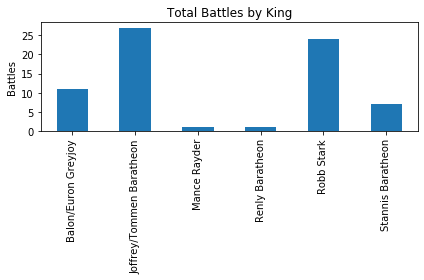

In [76]:
yticks = np.arange(0,cdata.max() + 2,5)
cdata.plot(kind='bar') # pandas plotting trick
# now we can customize in typical matplotlib style
plt.title('Total Battles by King')
plt.ylabel('Battles')
plt.yticks(yticks)
plt.tight_layout() # compresses, makes xlabels vertical
plt.show()